ValueError: x and y must have same first dimension, but have shapes (101,) and (200,)

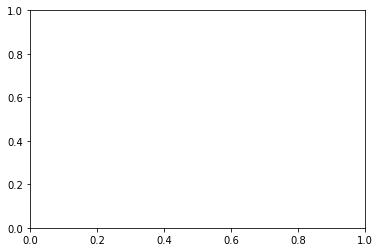

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df = pd.read_csv('data/ETT-small/ETTh1.csv').drop(columns='date').iloc[:200,:]
# X  = np.array(X).T # X must be numpy array in shape of (num var, num rows)

for col in list(df.columns):



    fs = 1/3600
    # fs = 20000
    X = df[col]
    X = X - np.mean(X) 
    X = X / np.std(X)


    # from scipy.signal import detrend
    # X = detrend(X)


    N = len(X)
    Y = np.fft.fft(X, 200)
    freqs = np.fft.rfftfreq(N, 1/fs)

    # normalize amplitude
    amp = np.abs(Y) / N
    
    
    amp[1:-1] *= 2   # single-sided correction
    # amp =  amp / np.max(amp)
    peaks_flat = np.zeros((len(freqs),1))

    amp_normal =  amp / np.max(amp)
    amp_normal[amp_normal < 0.015] = 0

    # step = int(len(freqs) *0.05)
    # peaks = []
    # f_peaks = []
    # for i in range(0,len(freqs),step):
    #     amp_w = amp_normal[i:i+step]
        


        

    #     idx = np.argmax(amp_w)

    #     pi = amp_normal[i+idx]
    #     freq_pi = freqs[i+idx]

    #     # if pi > 3* np.mean(amp_w):
    #     if pi > 5* np.mean(amp_w):
    #         if pi < 0.05: continue
    #         pi = amp[i+idx]

    #         peaks.append(pi)
    #         f_peaks.append(freq_pi)

    #         peaks_flat[i+idx] = pi


        

    idx = (freqs < 1) & (freqs > 0.9)



    # plot all freqs (for reference)
    plt.figure()
    # plt.plot(freqs[:2000], amp[:2000], label='All frequencies')
    plt.plot(freqs, amp_normal, label='All frequencies')
    plt.plot(freqs, peaks_flat, color='r', label='Major ones')
    
    # plt.scatter(f_peaks, peaks, color='r', label='Major ones')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.legend()

    break

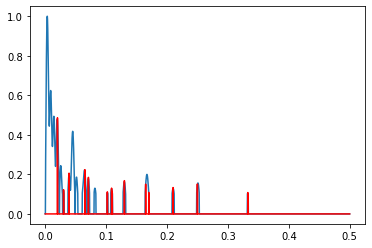

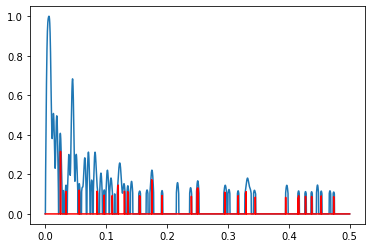

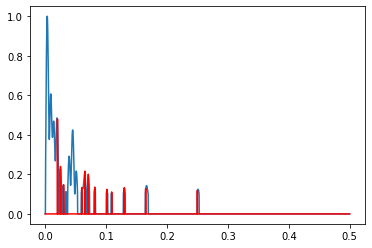

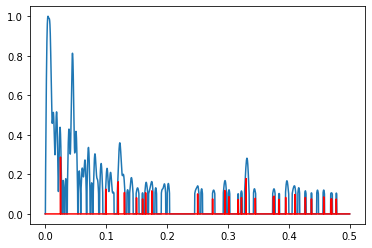

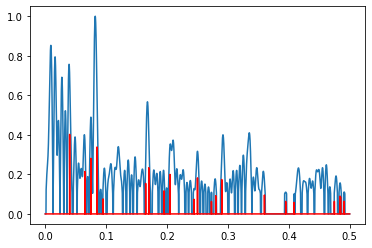

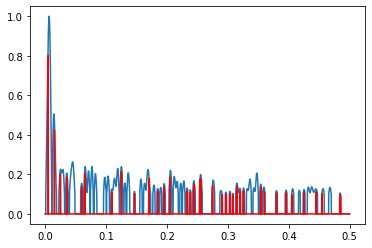

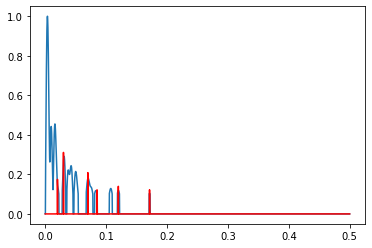

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df = pd.read_csv('data/ETT-small/ETTh1.csv').drop(columns='date').iloc[:200,:]
# X  = np.array(X).T # X must be numpy array in shape of (num var, num rows)

for col in list(df.columns):



    X = df[col]
    X = X - np.mean(X) 
    X = X / np.std(X)


    # from scipy.signal import detrend
    # X = detrend(X)
    fs = 1
    nfft = 3600*2
    
    Y = np.fft.rfft(X, n=nfft)                       # length = nfft//2 + 1
    freqs = np.fft.rfftfreq(nfft, d=1.0/fs)          # same length as Y

    # 2) single-sided amplitude spectrum (preserve physical amplitude w.r.t original length)
    amp = np.abs(Y) / N
    if nfft % 2 == 0:
        amp[1:-1] *= 2                               # double everything except DC & Nyquist
    else:
        amp[1:] *= 2                                 # double everything except DC

    # normalize amplitude
    amp = np.abs(Y) / N


    peaks_flat = np.zeros((len(freqs),1))


    amp[1:-1] *= 2   # single-sided correction
    amp_normal =  amp / np.max(amp)
    amp_normal[amp_normal < 0.1] = 0

    step = int(len(freqs) *0.01)
    peaks = []
    f_peaks = []
    for i in range(0,len(freqs),step):
        amp_w = amp_normal[i:i+step]
        
        idx = np.argmax(amp_w)

        pi = amp_normal[i+idx]
        freq_pi = freqs[i+idx]

        # if pi > 3* np.mean(amp_w):
        if pi > 2* np.mean(amp_w):
            if pi < 0.05: continue
            pi = amp[i+idx]

            peaks.append(pi)
            f_peaks.append(freq_pi)

            peaks_flat[i+idx] = pi




    # plot all freqs (for reference)
    plt.figure()
    plt.plot(freqs, amp_normal, label='All frequencies')
    plt.plot(freqs, peaks_flat, color='r', label='Major ones')

    # break

In [ ]:


X = pd.read_csv('X.csv',header=None)
X  = np.array(X).T # X must be numpy array in shape of (num var, num rows)
# aic, bic, moaic, mobic = tsdata_to_infocrit(X,10, False)



for p in range(1,):

    A, SIG, E = tsdata_to_var(X, p)
    G = var_to_autocov(A,SIG, q = 100)
    F = autocov_to_pwcgc(G,SIG)


    A, SIG, E = tsdata_to_var_torch(X,p)
    G = var_to_autocov_torch(A, SIG, q = 100)
    F1 = autocov_to_pwcgc_torch(G,SIG)
    # ,(SIG))

    






    # # # pd.DataFrame(np.squeeze(A))


    np.fill_diagonal(F, 0)
    F1 = np.array(F1)
    np.fill_diagonal(F1, 0)


    # np.sum(np.abs(G - G1))
    print(p,np.sum(np.abs(F - F1)))



1 7.227107801099919e-12
2 9.225953334635051e-12
3 7.566614002030292e-12
4 8.820721930646869e-12
5 6.750921199838444e-08
6 0.0006008779549679932


------- 0 1 -------


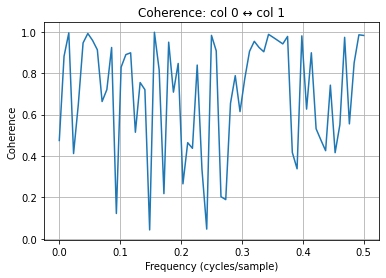

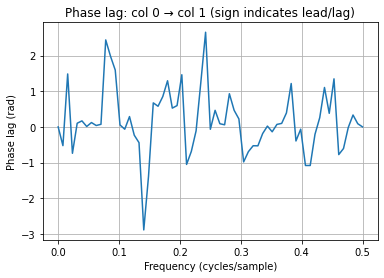

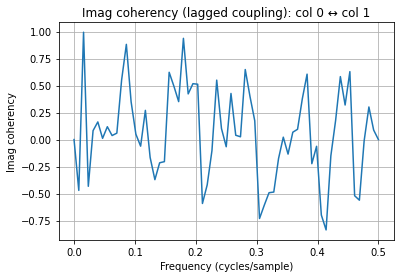

S shape: (65, 7, 7)
------- 0 2 -------


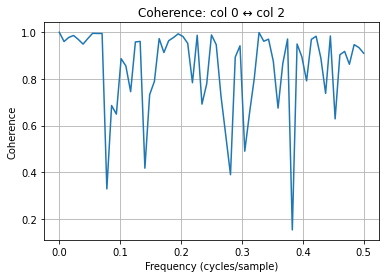

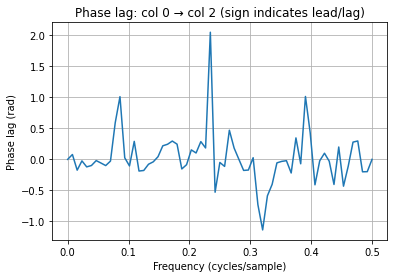

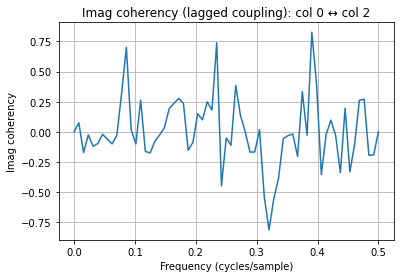

S shape: (65, 7, 7)
------- 0 3 -------


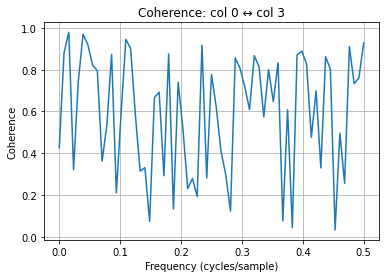

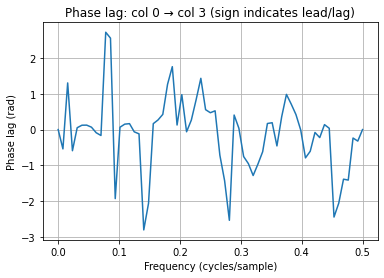

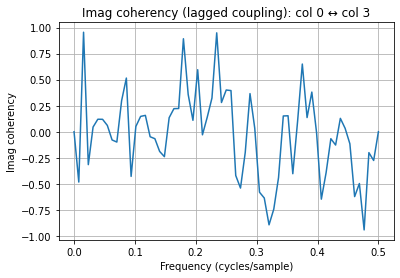

S shape: (65, 7, 7)
------- 0 4 -------


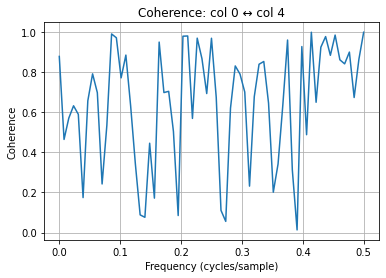

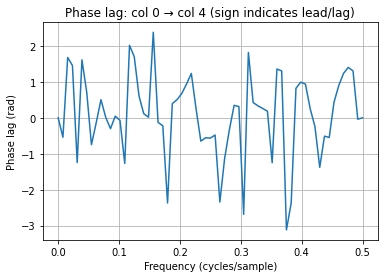

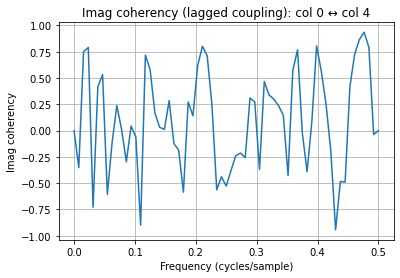

S shape: (65, 7, 7)
------- 0 5 -------


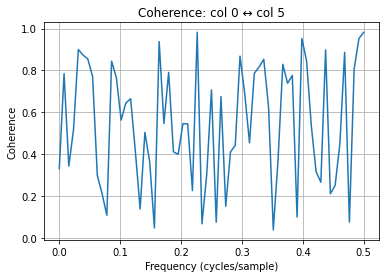

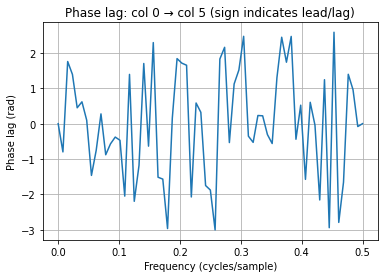

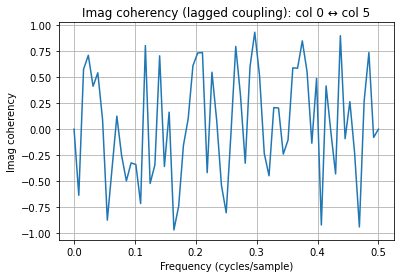

S shape: (65, 7, 7)
------- 0 6 -------


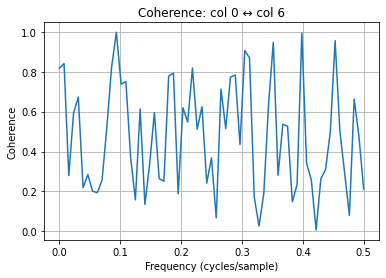

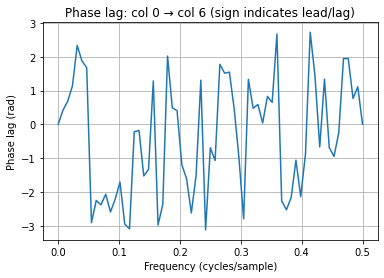

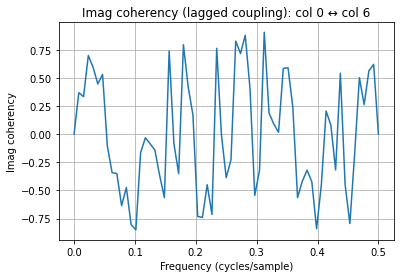

S shape: (65, 7, 7)
------- 1 2 -------


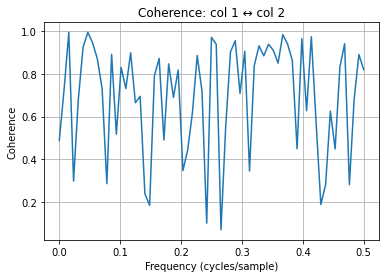

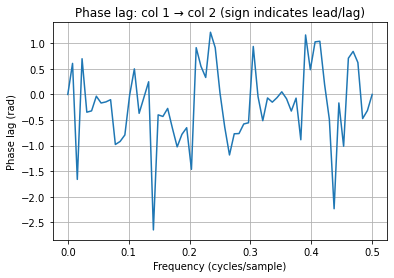

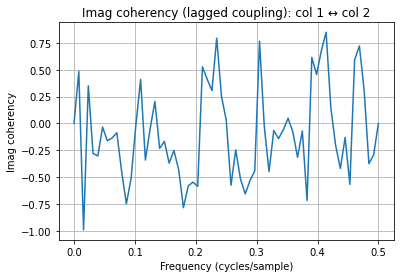

S shape: (65, 7, 7)
------- 1 3 -------


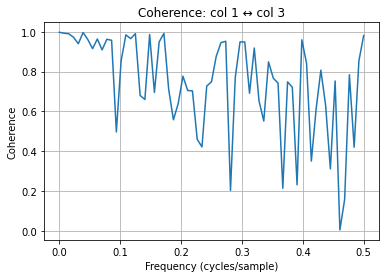

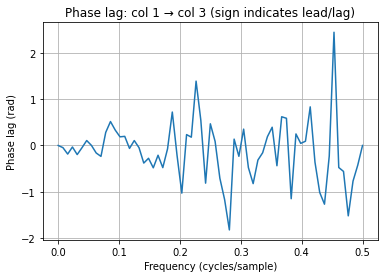

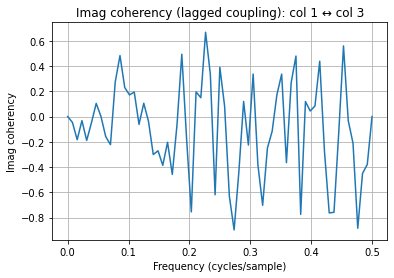

S shape: (65, 7, 7)
------- 1 4 -------


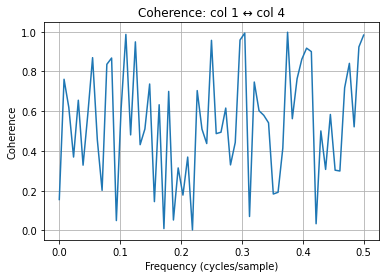

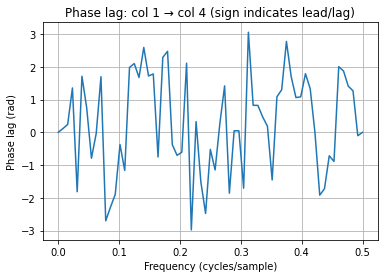

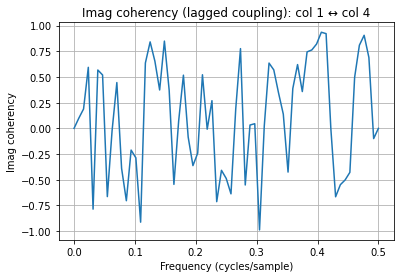

S shape: (65, 7, 7)
------- 1 5 -------


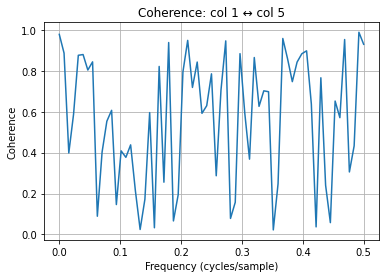

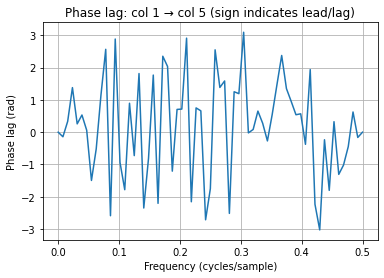

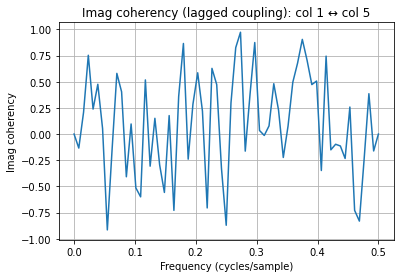

S shape: (65, 7, 7)
------- 1 6 -------


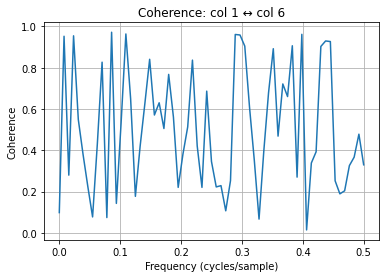

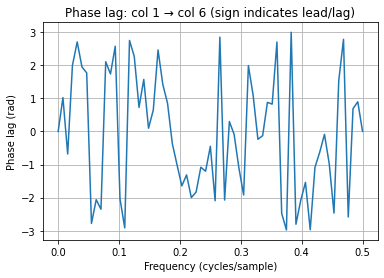

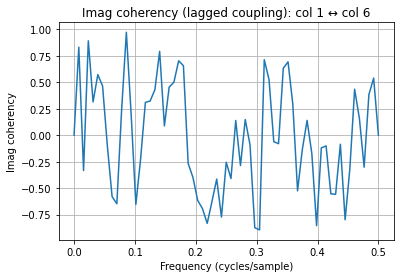

S shape: (65, 7, 7)
------- 2 3 -------


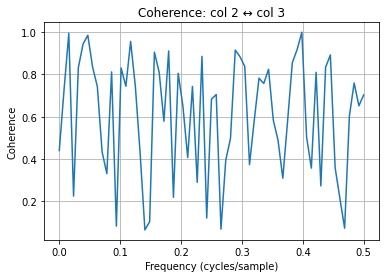

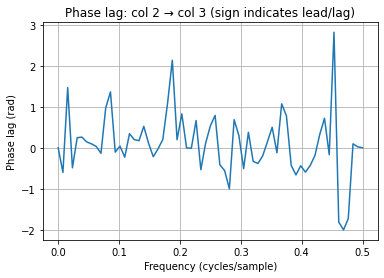

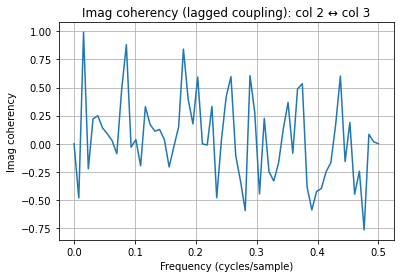

S shape: (65, 7, 7)
------- 2 4 -------


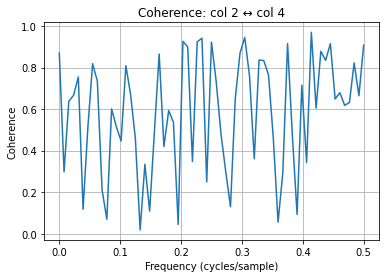

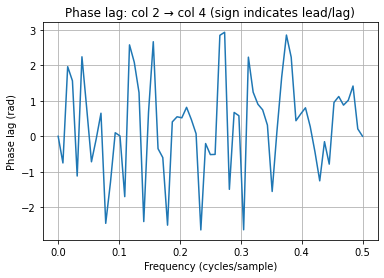

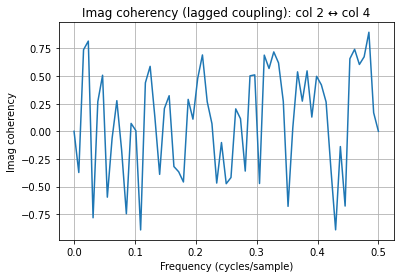

S shape: (65, 7, 7)
------- 2 5 -------


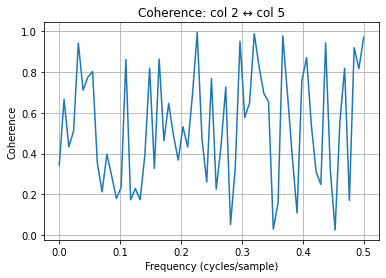

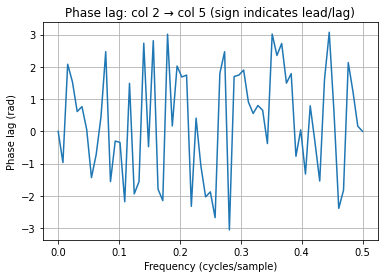

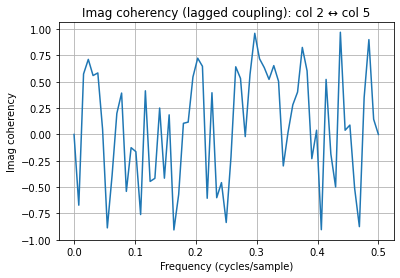

S shape: (65, 7, 7)
------- 2 6 -------


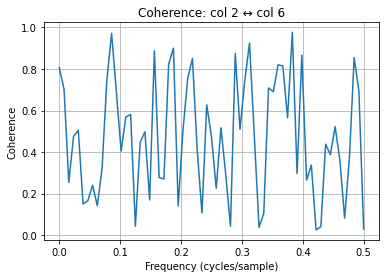

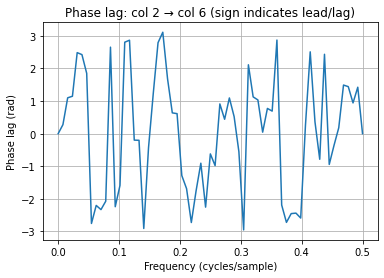

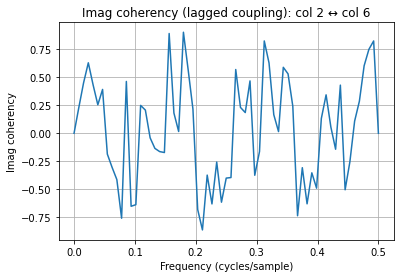

S shape: (65, 7, 7)
------- 3 4 -------


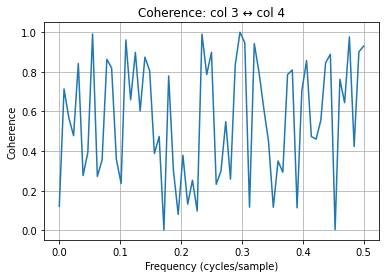

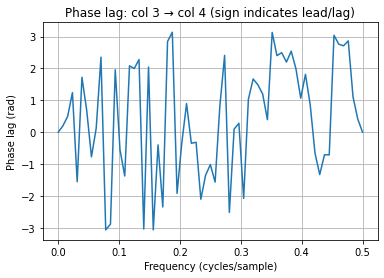

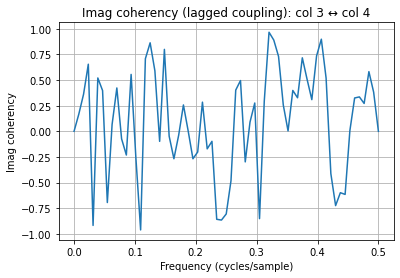

S shape: (65, 7, 7)
------- 3 5 -------


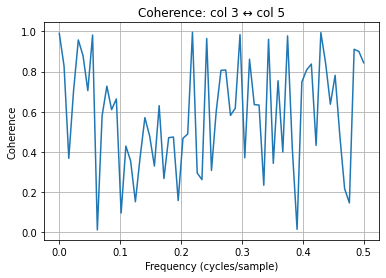

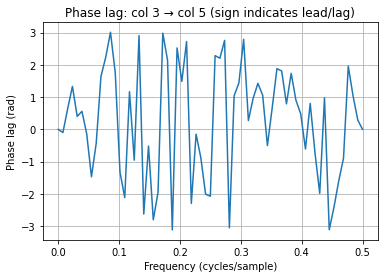

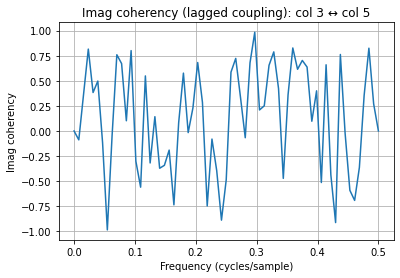

S shape: (65, 7, 7)
------- 3 6 -------


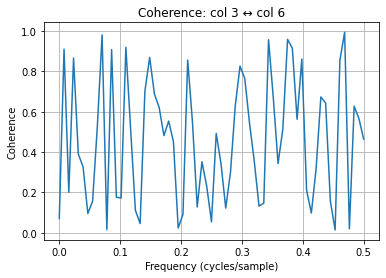

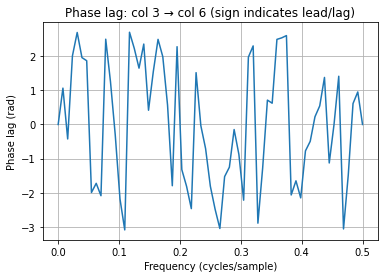

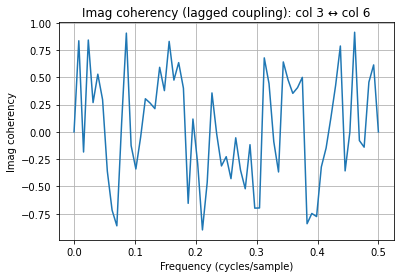

S shape: (65, 7, 7)
------- 4 5 -------


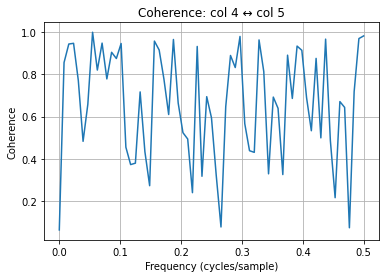

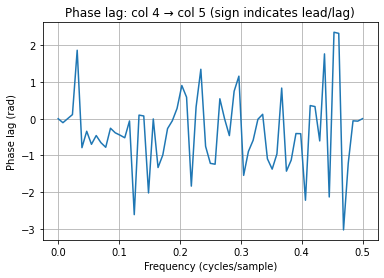

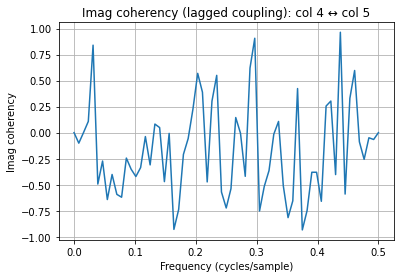

S shape: (65, 7, 7)
------- 4 6 -------


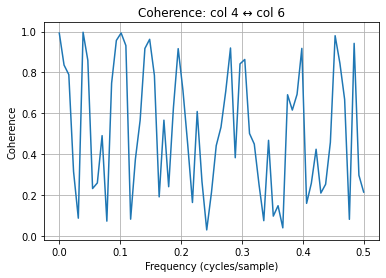

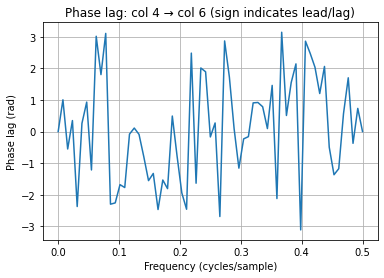

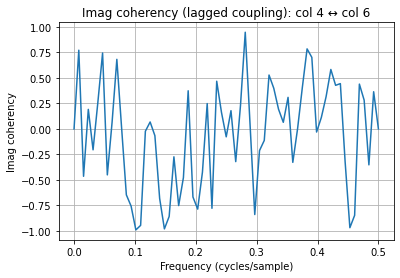

S shape: (65, 7, 7)
------- 5 6 -------


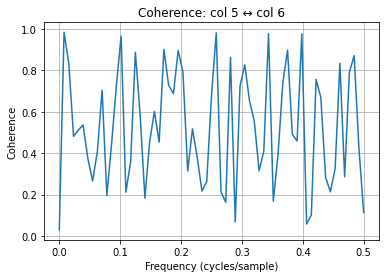

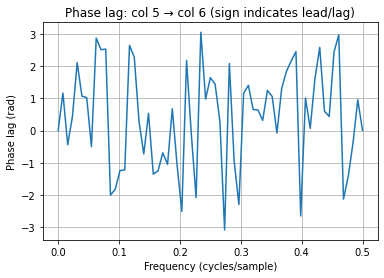

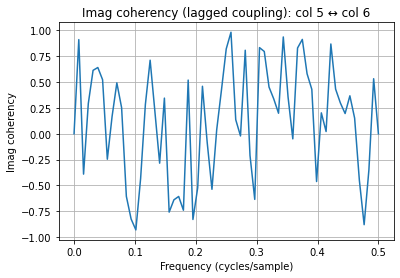

S shape: (65, 7, 7)


In [211]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt



# df = pd.read_csv('data/ETT-small/ETTh1.csv').drop(columns='date').iloc[:200,:]
# # X  = np.array(X).T # X must be numpy array in shape of (num var, num rows)

# for col in list(df.columns):



#     X = df[col]
#     X = X - np.mean(X) 
#     X = X / np.std(X)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 0) Load + standardize columns
# -----------------------------
df = pd.read_csv('data/ETT-small/ETTh1.csv').drop(columns='date').iloc[:200, :]

X = df.values.astype(float)                               # shape (N, D)
X = (X - X.mean(axis=0)) / X.std(axis=0, ddof=1)          # z-score each column
X = X.T                                                   # shape (D, N)
D, N = X.shape

# -----------------------------------------
# 1) Simple cross-spectrum (periodogram)
#    S[k] is a DxD matrix for frequency bin k
# -----------------------------------------
def cross_spectrum_periodogram(X, fs=1.0):
    D, N = X.shape
    K = N//2 + 1
    freqs = np.fft.rfftfreq(N, d=1.0/fs)

    # scale so Parseval holds in one-sided spectrum (periodogram convention)
    FX = np.fft.rfft(X, axis=1) / np.sqrt(N)
    # S[k, i, j] = FX[i, k] * conj(FX[j, k])
    S = np.einsum('dk,ek->kde', FX, np.conj(FX))          # shape (K, D, D)
    return freqs, S

# ---------------------------------------------------
# 2) Welch-averaged cross-spectrum (better estimates)
# ---------------------------------------------------
def cross_spectrum_welch(X, fs=1.0, nperseg=128, noverlap=64, window='hann'):
    """
    Returns:
      freqs: (K,)
      S: (K, D, D) complex cross-spectral density
    """
    D, N = X.shape
    step = nperseg - noverlap
    if step <= 0:
        raise ValueError("noverlap must be < nperseg")

    # window
    if window == 'hann':
        w = np.hanning(nperseg)
    else:
        raise NotImplementedError("only 'hann' in this snippet")

    U = (w**2).sum()  # window normalization factor

    # segment indices
    starts = np.arange(0, N - nperseg + 1, step)
    nseg = len(starts)
    K = nperseg//2 + 1
    freqs = np.fft.rfftfreq(nperseg, d=1.0/fs)

    S = np.zeros((K, D, D), dtype=complex)

    for s in starts:
        seg = X[:, s:s+nperseg] * w  # broadcast window over D rows
        FX = np.fft.rfft(seg, axis=1) / np.sqrt(U)  # scale by window energy
        S += np.einsum('dk,ek->kde', FX, np.conj(FX))

    S /= nseg
    return freqs, S

# pick one estimator:
freqs, S = cross_spectrum_welch(X, fs=1.0, nperseg=min(128, N), noverlap=min(64, max(0, min(128, N)-1)))

# --------------------------------------------
# 3) Derived quantities: power, coherence, etc.
# --------------------------------------------
# Power spectral densities (one-sided)
PSD = S.real.diagonal(axis1=1, axis2=2)  # shape (K, D)

def coherence(S, i, j):
    # |S_ij|^2 / (S_ii S_jj)
    num = np.abs(S[:, i, j])**2
    den = (S[:, i, i].real * S[:, j, j].real)
    return np.divide(num, den, out=np.zeros_like(num), where=den>0)

def phase_lag(S, i, j):
    return np.angle(S[:, i, j])  # radians

def imag_coherency(S, i, j):
    # Im{S_ij} / sqrt(S_ii S_jj) – emphasizes lagged (not instantaneous) coupling
    num = np.imag(S[:, i, j])
    den = np.sqrt(S[:, i, i].real * S[:, j, j].real)
    return np.divide(num, den, out=np.zeros_like(num), where=den>0)

# --------------------------------------------
# 4) Example: analyze a pair (i, j)
# --------------------------------------------
for i in range(7):
    for j in range(i+1,7):
        print('-------', i,j, '-------')



        Cij   = coherence(S, i, j)
        phi   = phase_lag(S, i, j)
        imcoh = imag_coherency(S, i, j)

        # -------------------------
        # 5) Minimal visualizations
        # -------------------------
        plt.figure()
        plt.plot(freqs, Cij)
        plt.xlabel('Frequency (cycles/sample)')
        plt.ylabel('Coherence')
        plt.title(f'Coherence: col {i} ↔ col {j}')
        plt.grid(True)
        plt.show()

        plt.figure()
        plt.plot(freqs, phi)
        plt.xlabel('Frequency (cycles/sample)')
        plt.ylabel('Phase lag (rad)')
        plt.title(f'Phase lag: col {i} → col {j} (sign indicates lead/lag)')
        plt.grid(True)
        plt.show()

        plt.figure()
        plt.plot(freqs, imcoh)
        plt.xlabel('Frequency (cycles/sample)')
        plt.ylabel('Imag coherency')
        plt.title(f'Imag coherency (lagged coupling): col {i} ↔ col {j}')
        plt.grid(True)
        plt.show()

        # --------------------------------------------
        # 6) S is your full cross-spectral matrix field
        #    S.shape == (K, D, D)
        # --------------------------------------------
        print("S shape:", S.shape)
